In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("crime_safety_dataset.csv")
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other


In [3]:
df.shape

(1000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   int64 
 1   date                  1000 non-null   object
 2   time                  1000 non-null   object
 3   crime_type            1000 non-null   object
 4   city                  1000 non-null   object
 5   state                 1000 non-null   object
 6   location_description  1000 non-null   object
 7   victim_age            1000 non-null   int64 
 8   victim_gender         1000 non-null   object
 9   victim_race           1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


In [5]:
df.isnull().sum()

id                      0
date                    0
time                    0
crime_type              0
city                    0
state                   0
location_description    0
victim_age              0
victim_gender           0
victim_race             0
dtype: int64

In [6]:
df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"])

df["hour"] = df["datetime"].dt.hour
df["dayofweek"] = df["datetime"].dt.dayofweek
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year

In [7]:
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race,datetime,hour,dayofweek,month,year
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other,2022-09-09 18:58:57,18,4,9,2022
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black,2022-07-10 12:10:59,12,6,7,2022
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian,2024-12-31 09:26:12,9,1,12,2024
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian,2024-04-12 23:17:28,23,4,4,2024
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other,2023-07-19 04:49:39,4,2,7,2023


In [8]:
df.drop(columns=["id", "date", "time", "location_description", "datetime"], inplace=True)

In [9]:
df.head()

,crime_type,city,state,victim_age,victim_gender,victim_race,hour,dayofweek,month,year
0,Homicide,Philadelphia,PA,34,Male,Other,18,4,9,2022
1,Assault,Phoenix,AZ,13,Female,Black,12,6,7,2022
2,Burglary,San Antonio,TX,23,Male,Asian,9,1,12,2024
3,Vandalism,Philadelphia,PA,36,Other,Asian,23,4,4,2024
4,Fraud,San Antonio,TX,26,Other,Other,4,2,7,2023


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   crime_type     1000 non-null   object
 1   city           1000 non-null   object
 2   state          1000 non-null   object
 3   victim_age     1000 non-null   int64 
 4   victim_gender  1000 non-null   object
 5   victim_race    1000 non-null   object
 6   hour           1000 non-null   int32 
 7   dayofweek      1000 non-null   int32 
 8   month          1000 non-null   int32 
 9   year           1000 non-null   int32 
dtypes: int32(4), int64(1), object(5)
memory usage: 62.6+ KB


In [11]:
label_cols = ['crime_type', 'city', 'state', 'victim_gender', 'victim_race']
le_dict = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le 

In [12]:
for col in le_dict:
    print(f"\n----- {col.upper()} -----")
    for i, class_Name in enumerate(le_dict[col].classes_):
        print(f"{class_Name} --- {i}")


----- CRIME_TYPE -----
Arson --- 0
Assault --- 1
Burglary --- 2
Domestic Violence --- 3
Drug Offense --- 4
Fraud --- 5
Homicide --- 6
Robbery --- 7
Theft --- 8
Vandalism --- 9

----- CITY -----
Chicago --- 0
Dallas --- 1
Houston --- 2
Los Angeles --- 3
New York --- 4
Philadelphia --- 5
Phoenix --- 6
San Antonio --- 7
San Diego --- 8
San Jose --- 9

----- STATE -----
AZ --- 0
CA --- 1
IL --- 2
NY --- 3
PA --- 4
TX --- 5

----- VICTIM_GENDER -----
Female --- 0
Male --- 1
Non-binary --- 2
Other --- 3

----- VICTIM_RACE -----
Asian --- 0
Black --- 1
Hispanic --- 2
Other --- 3
White --- 4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   crime_type     1000 non-null   int64
 1   city           1000 non-null   int64
 2   state          1000 non-null   int64
 3   victim_age     1000 non-null   int64
 4   victim_gender  1000 non-null   int64
 5   victim_race    1000 non-null   int64
 6   hour           1000 non-null   int32
 7   dayofweek      1000 non-null   int32
 8   month          1000 non-null   int32
 9   year           1000 non-null   int32
dtypes: int32(4), int64(6)
memory usage: 62.6 KB


In [14]:
df.head()

,crime_type,city,state,victim_age,victim_gender,victim_race,hour,dayofweek,month,year
0,6,5,4,34,1,3,18,4,9,2022
1,1,6,0,13,0,1,12,6,7,2022
2,2,7,5,23,1,0,9,1,12,2024
3,9,5,4,36,3,0,23,4,4,2024
4,5,7,5,26,3,3,4,2,7,2023


In [15]:
x = df.drop(columns=["crime_type"])   #all features in "x"
y = df["crime_type"] #target/output in y

In [16]:
#Divide Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Scale
scaler = StandardScaler()
x_trian_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

#Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_trian_scale, y_train)

#Predict
y_pred = knn.predict(x_test_scale)

#Evalution
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6 2 1 0 5 1 4 0 1 2]
 [4 4 6 1 4 1 0 0 1 0]
 [6 2 4 0 1 2 3 2 2 1]
 [5 3 4 3 2 2 1 0 1 1]
 [5 3 2 2 0 1 3 0 2 0]
 [6 0 4 2 0 0 2 0 2 0]
 [2 4 2 2 2 0 2 1 2 2]
 [4 2 3 6 0 0 2 2 0 2]
 [4 4 5 0 3 0 1 0 0 2]
 [7 1 4 2 0 0 2 1 0 2]]
              precision    recall  f1-score   support

           0       0.12      0.27      0.17        22
           1       0.16      0.19      0.17        21
           2       0.11      0.17      0.14        23
           3       0.17      0.14      0.15        22
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        16
           6       0.10      0.11      0.10        19
           7       0.33      0.10      0.15        21
           8       0.00      0.00      0.00        19
           9       0.17      0.11      0.13        19

    accuracy                           0.12       200
   macro avg       0.12      0.11      0.10       200
weighted avg       0.12      0.12      0.11       200



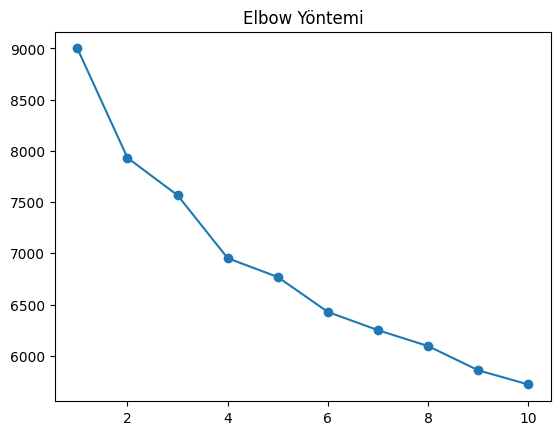

In [20]:
x_cluster = df.drop(columns=['crime_type'])
x_scaled = scaler.fit_transform(x_cluster)

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Yöntemi')


plt.show()

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(x_scaled)

# Cluster count
print(df["Cluster"].value_counts())

Cluster
2    425
1    293
0    282
Name: count, dtype: int64


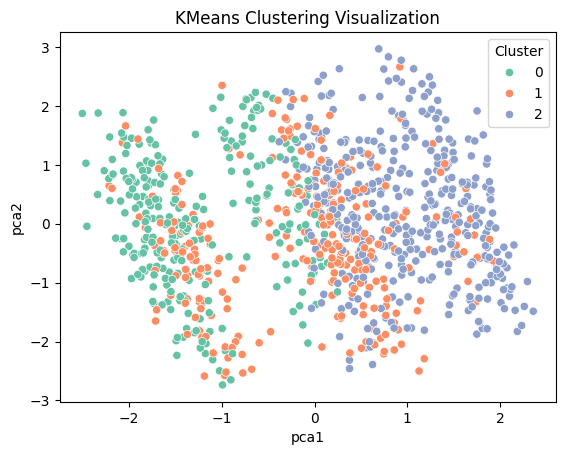

In [26]:
pca = PCA(n_components=2)
components = pca.fit_transform(x_scaled)

df["pca1"] = components[:, 0]
df["pca2"] = components[:, 1]

sns.scatterplot(data=df, x="pca1", y="pca2", hue="Cluster", palette="Set2")
plt.title('KMeans Clustering Visualization')
plt.show()